In [1]:
import numpy as np
import pandas as pd
import pyreadr
import datetime
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import seaborn as sns
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, GroupShuffleSplit
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler 
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso

In [2]:
# define paths
data_path = '/Users/simonneumeyer/Dropbox/Ethiopia IE - Road Safety/Data/'
crashes_path = 'ETRE - Crashes/'
crash_file = 'FinalData/crashes.csv'
traffic_path = 'ETRE - Traffic/'
traffic_file = 'FinalData/traffic.pq'
precipitation_path = 'Precipitation/'
precipitation_file = 'FinalData/precipitation.csv'

In [3]:
segment_time = pd.read_parquet(data_path + 'Time Segment Data/segment_time_panel.pq', engine='pyarrow')
#segment_time = pd.read_parquet(data_path + 'Time Segment Data/segment_time_panel_km_3_hr_1.pq', engine='pyarrow')

segment_time[['avg_weight_tons', 'total_weight', 'speed_km_hr', 
        'veh_type_1', 'veh_type_2', 'veh_type_3', 'veh_type_4', 'veh_type_5', 'veh_type_6', 'veh_type_7', 
        'speed_rain', 'N_crashes_y', 'N_crashes_to_addis',
       'N_crashes_to_adama', 'N_crashes_2015', 'N_crashes_2017',
       'N_crashes_2016', 'N_crashes_to_addis_2015',
       'N_crashes_to_adama_2017', 'N_crashes_to_addis_2017',
       'N_crashes_to_addis_2016', 'N_crashes_to_adama_2016',
       'N_crashes_to_adama_2015', 'turnangle_10m', 'turnangle_50m',
       'turnangle_100m', 'turnangle_250m', 'turnangle_500m',
       'N_crashes_MA_sum_500m', 'N_crashes_to_addis_MA_sum_500m',
       'N_crashes_to_adama_MA_sum_500m', 'N_crashes_2015_MA_sum_500m',
       'N_crashes_2017_MA_sum_500m', 'N_crashes_2016_MA_sum_500m',
       'N_crashes_to_addis_2015_MA_sum_500m',
       'N_crashes_to_adama_2017_MA_sum_500m',
       'N_crashes_to_addis_2017_MA_sum_500m',
       'N_crashes_to_addis_2016_MA_sum_500m',
       'N_crashes_to_adama_2016_MA_sum_500m',
       'N_crashes_to_adama_2015_MA_sum_500m', 'N_crashes_MA_sum_1000m',
       'N_crashes_to_addis_MA_sum_1000m',
       'N_crashes_to_adama_MA_sum_1000m', 'N_crashes_2015_MA_sum_1000m',
       'N_crashes_2017_MA_sum_1000m', 'N_crashes_2016_MA_sum_1000m',
       'N_crashes_to_addis_2015_MA_sum_1000m',
       'N_crashes_to_adama_2017_MA_sum_1000m',
       'N_crashes_to_addis_2017_MA_sum_1000m',
       'N_crashes_to_addis_2016_MA_sum_1000m',
       'N_crashes_to_adama_2016_MA_sum_1000m',
       'N_crashes_to_adama_2015_MA_sum_1000m',
       'turnangle_50m_MA_mean_500m', 'turnangle_100m_MA_mean_500m',
       'turnangle_250m_MA_mean_500m', 'turnangle_500m_MA_mean_500m',
       'turnangle_10m_MA_mean_1000m', 'turnangle_50m_MA_mean_1000m',
       'turnangle_100m_MA_mean_1000m', 'turnangle_250m_MA_mean_1000m',
       'turnangle_500m_MA_mean_1000m']] = segment_time[['avg_weight_tons', 'total_weight', 'speed_km_hr', 
        'veh_type_1', 'veh_type_2', 'veh_type_3', 'veh_type_4', 'veh_type_5', 'veh_type_6', 'veh_type_7', 
        'speed_rain', 'N_crashes_y', 'N_crashes_to_addis',
       'N_crashes_to_adama', 'N_crashes_2015', 'N_crashes_2017',
       'N_crashes_2016', 'N_crashes_to_addis_2015',
       'N_crashes_to_adama_2017', 'N_crashes_to_addis_2017',
       'N_crashes_to_addis_2016', 'N_crashes_to_adama_2016',
       'N_crashes_to_adama_2015', 'turnangle_10m', 'turnangle_50m',
       'turnangle_100m', 'turnangle_250m', 'turnangle_500m',
       'N_crashes_MA_sum_500m', 'N_crashes_to_addis_MA_sum_500m',
       'N_crashes_to_adama_MA_sum_500m', 'N_crashes_2015_MA_sum_500m',
       'N_crashes_2017_MA_sum_500m', 'N_crashes_2016_MA_sum_500m',
       'N_crashes_to_addis_2015_MA_sum_500m',
       'N_crashes_to_adama_2017_MA_sum_500m',
       'N_crashes_to_addis_2017_MA_sum_500m',
       'N_crashes_to_addis_2016_MA_sum_500m',
       'N_crashes_to_adama_2016_MA_sum_500m',
       'N_crashes_to_adama_2015_MA_sum_500m', 'N_crashes_MA_sum_1000m',
       'N_crashes_to_addis_MA_sum_1000m',
       'N_crashes_to_adama_MA_sum_1000m', 'N_crashes_2015_MA_sum_1000m',
       'N_crashes_2017_MA_sum_1000m', 'N_crashes_2016_MA_sum_1000m',
       'N_crashes_to_addis_2015_MA_sum_1000m',
       'N_crashes_to_adama_2017_MA_sum_1000m',
       'N_crashes_to_addis_2017_MA_sum_1000m',
       'N_crashes_to_addis_2016_MA_sum_1000m',
       'N_crashes_to_adama_2016_MA_sum_1000m',
       'N_crashes_to_adama_2015_MA_sum_1000m',
       'turnangle_50m_MA_mean_500m', 'turnangle_100m_MA_mean_500m',
       'turnangle_250m_MA_mean_500m', 'turnangle_500m_MA_mean_500m',
       'turnangle_10m_MA_mean_1000m', 'turnangle_50m_MA_mean_1000m',
       'turnangle_100m_MA_mean_1000m', 'turnangle_250m_MA_mean_1000m',
       'turnangle_500m_MA_mean_1000m']].fillna(0)

In [4]:
#segment_time.columns.values

In [5]:
cols = ['k_cars', 'weekend', 
        'holiday', 'holiday_plusminus_2day', 'speed_p90', 'rush_hour_dummy', 'avg_weight_tons', 
        'veh_type_1', 'veh_type_3', 'veh_type_4', 'veh_type_5', 'veh_type_6', 'veh_type_7', 
        'speed_rain', 'midnight_dummy', 
        'rain_seg_1', 'rain_seg_2', 'rain_seg_3', 'rain_seg_4', 'rain_seg_5', 'rain_seg_6',
        
#        'N_crashes_to_addis_MA_sum_1000m', 'N_crashes_to_addis_2015_MA_sum_500m',
        'N_crashes_2016_MA_sum_1000m', #'N_crashes_to_addis_2017_MA_sum_1000m', 'N_crashes_to_addis'
#       'N_crashes_y', 'N_crashes_to_addis',
#       'N_crashes_to_adama', 'N_crashes_2015', 'N_crashes_2017',
#       'N_crashes_2016', 'N_crashes_to_addis_2015',
#       'N_crashes_to_adama_2017', 'N_crashes_to_addis_2017',
#       'N_crashes_to_addis_2016', 'N_crashes_to_adama_2016',
#       'N_crashes_to_adama_2015', 'turnangle_10m', 'turnangle_50m',
#       'turnangle_100m', 'turnangle_250m', 'turnangle_500m',
#       'N_crashes_MA_sum_500m', 'N_crashes_to_addis_MA_sum_500m',
#       'N_crashes_to_adama_MA_sum_500m', 'N_crashes_2015_MA_sum_500m',
#       'N_crashes_2017_MA_sum_500m', 'N_crashes_2016_MA_sum_500m',
#       'N_crashes_to_addis_2015_MA_sum_500m',
#       'N_crashes_to_adama_2017_MA_sum_500m',
#       'N_crashes_to_addis_2017_MA_sum_500m',
#       'N_crashes_to_addis_2016_MA_sum_500m',
#       'N_crashes_to_adama_2016_MA_sum_500m',
#       'N_crashes_to_adama_2015_MA_sum_500m', 'N_crashes_MA_sum_1000m',
#       'N_crashes_to_addis_MA_sum_1000m',
#       'N_crashes_to_adama_MA_sum_1000m', 'N_crashes_2015_MA_sum_1000m',
#       'N_crashes_2017_MA_sum_1000m', 'N_crashes_2016_MA_sum_1000m',
#       'N_crashes_to_addis_2015_MA_sum_1000m',
#       'N_crashes_to_adama_2017_MA_sum_1000m',
#       'N_crashes_to_addis_2017_MA_sum_1000m',
#       'N_crashes_to_addis_2016_MA_sum_1000m',
#       'N_crashes_to_adama_2016_MA_sum_1000m',
#       'N_crashes_to_adama_2015_MA_sum_1000m',
#       'turnangle_50m_MA_mean_500m', 'turnangle_100m_MA_mean_500m',
#       'turnangle_250m_MA_mean_500m', 'turnangle_500m_MA_mean_500m',
#       'turnangle_10m_MA_mean_1000m', 'turnangle_50m_MA_mean_1000m',
#       'turnangle_100m_MA_mean_1000m', 'turnangle_250m_MA_mean_1000m','turnangle_500m_MA_mean_1000m'
       ]

segment_time = segment_time.dropna(subset=['speed_mean']).reset_index()

In [6]:
# time based split: 
        # train -> 2015-03-01 until 2017-06-30
        # test -> 2017-07-01 until 2017-12-31
thresh = pd.to_datetime('2017-06-30')

train = segment_time[segment_time.date <= thresh]
test = segment_time[segment_time.date > thresh]

In [7]:
y_train = train.accidents
y_test = test.accidents

X_train = train[cols]
X_test = test[cols]

# Feature Scaling:

In [8]:
#from sklearn import preprocessing
#
#scaler = preprocessing.StandardScaler().fit(X_train)
#X_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)
#
#X_train = pd.DataFrame(X_scaled, columns=X_train.columns)
#X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Inspect correlations:

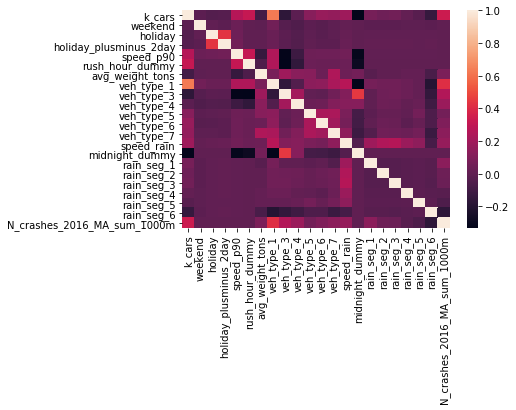

In [9]:
# check for correlation between covariates:

X = segment_time[cols]

corr = np.corrcoef(X.T)
sns.heatmap(corr, xticklabels=X.columns, yticklabels=X.columns)
plt.show()

# Treat class imbalance:

## Undersampling:

In [10]:
## To treat class imbalance I randomly delete majority class observations (non-accidents) in the train set:
#rus = RandomUnderSampler(random_state=0)
#X_train, y_train = rus.fit_resample(X_train, y_train)
#
##from imblearn.over_sampling import SMOTE
##X, y = SMOTE().fit_resample(X, y)
#
#y_train.value_counts(normalize=True)

## Oversampling:

In [11]:
# Set an index column that will identify duplicates later:
X_train = X_train.reset_index()
X_train.rename(columns={'index': 'groups'}, inplace=True)

In [12]:
## To treat class imbalance I randomly copy minority class observations (non-accidents) in the train set:
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [13]:
groups = X_train['groups'].copy() # for the group-based split

In [14]:
X_train = X_train.drop(columns='groups')

# Random Forest:

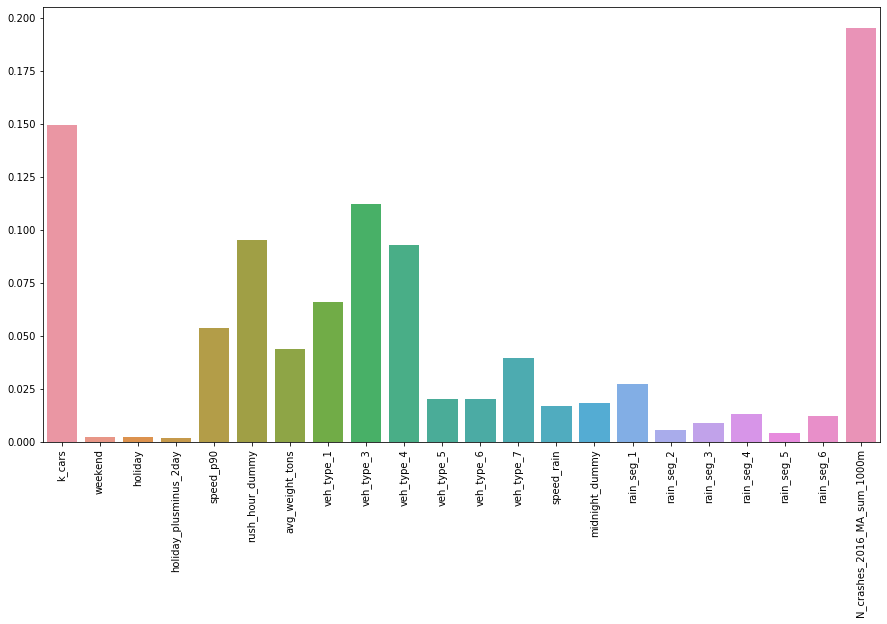

CPU times: user 25min 37s, sys: 16.6 s, total: 25min 54s
Wall time: 7min 28s


In [15]:
%%time
regr = RandomForestClassifier(max_depth=6, min_samples_split=2, n_estimators=90, random_state=0, n_jobs=-1)
regr.fit(X_train, y_train)

# feature importance:
plt.figure(figsize=(15,8))
sns.barplot(x=X_train.columns, y=regr.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [16]:
# prediction:
y_pred = regr.predict(X_test)

prec, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)
print(f'Precision: {[round(x,2) for x in prec]}, \nRecall: {[round(x,2) for x in recall]}, \nF1_Score: {[round(x,2) for x in f1_score]}')

Precision: [1.0, 0.0], 
Recall: [0.56, 0.75], 
F1_Score: [0.71, 0.0]


Precision:
1. how many of my predicted zeros are actually zeros: Close to 100%, 
not difficult as most labels are actually 0.
2. How many of my predicted ones are actually ones: Close to 0%, 
not surprising either, as there are almost no accidents.

Recall:
1. How many of actual zeros did I classify as 0: 30% --> not good!
2. How many of actual ones did I classify as 1: 93% --> good!

    -> This algorithm seems to have a tendency to overestimate the likelihood of an accident (y=1).

F1_score is a problematic measure when we have class imbalance.

   
   -> roc auc score: https://stats.stackexchange.com/questions/132777/what-does-auc-stand-for-and-what-is-it


In [17]:
y_pred_prob = [x[1] for x in regr.predict_proba(X_test)]
round(roc_auc_score(y_test, y_pred_prob), 3)

0.709

0.709

# XGBoost:

In [20]:
%%time
xgb_model = xgb.XGBClassifier(colsample_bytree=0.7, eval_metric='auc', learning_rate=0.3, 
 max_depth=2, min_child_weight=11, missing=-999, n_estimators=8, 
 objective='binary:logistic', reg_lambda=1.5, seed=1337, silent=1, n_jobs=-1, verbosity=0)

# fit
xgb_model.fit(X_train, y_train)

# predict
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = [x[1] for x in xgb_model.predict_proba(X_test)]

# validation
round(roc_auc_score(y_test, y_pred_proba_xgb),3)

# precision, recall and f1 score:
#prec, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred_xgb)
#print(f'Precision: {[round(x,2) for x in prec]}, \nRecall: {[round(x,2) for x in recall]}, \nF1_Score: {[round(x,2) for x in f1_score]}')

CPU times: user 1min 15s, sys: 2.9 s, total: 1min 18s
Wall time: 1min 19s


0.729

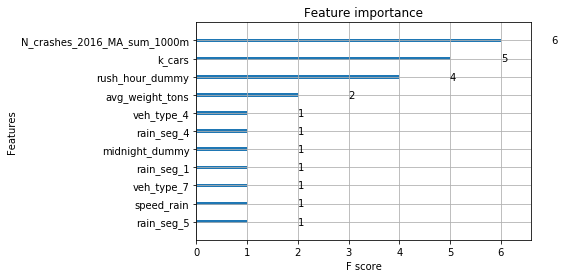

In [19]:
xgb.plot_importance(xgb_model)
plt.show()

#xgb.plot_tree(xgb_model)
#plt.show()

Without scaling: 0.729

# Grid Search:

## with Random Forest

In [60]:
param_grid = {'max_depth': [2, 4, 6, 30, 50, 100],
              'min_samples_split': [2, 4, 5, 7],
             'n_estimators': [90, 100, 110]}
rf_model = RandomForestClassifier(random_state=0)

grid_search_rf_model = GridSearchCV(rf_model, param_grid, n_jobs=-1, 
                   cv=GroupShuffleSplit(n_splits=1, train_size=.8, random_state=42).split(X_train, y_train, groups),
                   scoring='roc_auc',
                   verbose=20,
                   refit=True)

In [61]:
%%time
grid_search_rf_model.fit(X_train, y_train)

Fitting 1 folds for each of 72 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed: 24.9min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 33.4min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed: 37.5min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed: 50.4min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 54.3min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed: 54

CPU times: user 1h 2min 37s, sys: 40.6 s, total: 1h 3min 17s
Wall time: 16h 46min 40s


GridSearchCV(cv=<generator object BaseShuffleSplit.split at 0x1c7ab0ef50>,
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 30, 50, 100],
                         'min_samples_split': [2, 4, 5, 7],
                         'n_estimators': [90, 100, 110]},
             scoring='roc_auc', verbose=20)

In [62]:
y_pred_prob_gs = [x[1] for x in grid_search_rf_model.predict_proba(X_test)]
roc_auc_score(y_test, y_pred_prob_gs)

0.5022531789415936

0.7134958011544497

In [63]:
grid_search_rf_model.best_params_

{'max_depth': 100, 'min_samples_split': 2, 'n_estimators': 90}

{'max_depth': 6, 'min_samples_split': 7, 'n_estimators': 90}


In [51]:
#grid_search_rf_model.cv_results_

## With XGboost

In [15]:
%%time

xgb_model = xgb.XGBClassifier()
lgbm_model = lgb.LGBMClassifier()

# from https://www.kaggle.com/phunter/xgboost-with-gridsearchcv brute force scan for all parameters, here 
#are the tricks usually max_depth is 6,7,8 learning rate is around 0.05, but small changes may make big diff
#tuning min_child_weight subsample colsample_bytree can have much fun of fighting against overfit 
#n_estimators is how many round of boosting finally, ensemble xgboost with multiple seeds may reduce variance

parameters = {'learning_rate': [0.001, 0.01, 0.1, 0.5, 0.8], # so called `eta` value
              'objective':['binary:logistic'], # objective for internal optimization technique
              'eval_metric':['auc'], 
              #'num_leaves': [6, 7, 8, 10, 25, 31, 35, 40, 50, 100, 200],
              'max_depth': [2, 5, 6, 7, 10, None],
              'min_child_weight': [11],
              'silent': [1],
              #'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [2, 6, 8, 10], # number of trees 
              'missing':[-999],
              'reg_lambda':[1.5],
              'seed': [1337]}


clf = GridSearchCV(xgb_model, parameters, n_jobs=-1, 
                   #cv=10,
                   cv=GroupShuffleSplit(n_splits=1, train_size=.8, random_state=42).split(X_train, y_train, groups),
                   scoring='roc_auc',
                   verbose=20, refit=True)

clf.fit(X_train, y_train)

Fitting 1 folds for each of 120 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed: 23

[07:53:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:53:30] WARNING: /Users/travis/build/dmlc/xgboost/src/gbm/gbtree.cc:139: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
CPU times: user 2min 14s, sys: 11.9 s, total: 2min 26s
Wall time: 2h 41min 11s


GridSearchCV(cv=<generator object BaseShuffleSplit.split at 0x1a2a391f50>,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=n...
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7], 'eval_metric': ['auc'],
                         'learning_rate': [0.001, 0.01, 0.1, 0.5, 0.8],
            

In [16]:
y_pred_prob_gs_xgb = [x[1] for x in clf.predict_proba(X_test)]
print(roc_auc_score(y_test, y_pred_prob_gs_xgb))
clf.best_params_
#clf.cv_results_

0.6909041818332131


{'colsample_bytree': 0.7,
 'eval_metric': 'auc',
 'learning_rate': 0.8,
 'max_depth': 2,
 'min_child_weight': 11,
 'missing': -999,
 'n_estimators': 8,
 'objective': 'binary:logistic',
 'reg_lambda': 1.5,
 'seed': 1337,
 'silent': 1}

0.7186644565332025:

{'colsample_bytree': 0.7,
 'eval_metric': 'auc',
 'learning_rate': 0.3,
 'max_depth': 2,
 'min_child_weight': 11,
 'missing': -999,
 'n_estimators': 8,
 'objective': 'binary:logistic',
 'reg_lambda': 1.5,
 'seed': 1337,
 'silent': 1}

## LightGBM:

In [22]:
%%time

lgbm_model = lgb.LGBMClassifier(colsample_bytree=0.7,
                                eval_metric='auc',
                                learning_rate=0.8,
                                max_depth=2,
                                min_child_weight=11,
                                missing=-999,
                                n_estimators=8,
                                objective='binary',
                                reg_lambda=1.5,
                                seed=1337,
                                silent=1
                               )

# from https://www.kaggle.com/phunter/xgboost-with-gridsearchcv brute force scan for all parameters, here 
#are the tricks usually max_depth is 6,7,8 learning rate is around 0.05, but small changes may make big diff
#tuning min_child_weight subsample colsample_bytree can have much fun of fighting against overfit 
#n_estimators is how many round of boosting finally, ensemble xgboost with multiple seeds may reduce variance

parameters = {'learning_rate': [0.005], # so called `eta` value
              'objective':['binary'], # checked for alternative but this is the best one
              'eval_metric':['auc'], # checked for alternative but this is the best one
              'num_leaves': [6, 7, 8, 10, 25, 31, 35, 40, 50, 100],
              'max_depth': [2, 4, 5, 6, 7, 10, 50, 100],
              'min_child_weight': [11],
              'silent': [1],
              #'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [2, 6, 8, 10, 15, 30, 50, 60, 100, 150, 300], # number of trees 
              'missing':[-999],
              'reg_lambda':[1.5],
              'seed': [1337]}


lgbm_gs = GridSearchCV(lgbm_model, parameters, n_jobs=-1, 
                   cv=10,
                   scoring='roc_auc',
                   verbose=7, refit=True)

lgbm_model.fit(X_train, y_train)

CPU times: user 25.2 s, sys: 3.04 s, total: 28.2 s
Wall time: 14.4 s


LGBMClassifier(colsample_bytree=0.7, eval_metric='auc', learning_rate=0.8,
               max_depth=2, min_child_weight=11, missing=-999, n_estimators=8,
               objective='binary', reg_lambda=1.5, seed=1337, silent=1)

In [24]:
y_pred_prob_gs_xgb = [x[1] for x in lgbm_model.predict_proba(X_test)]
print(roc_auc_score(y_test, y_pred_prob_gs_xgb))
clf.best_params_
#clf.cv_results_

0.6849339983436865


{'colsample_bytree': 0.7,
 'eval_metric': 'auc',
 'learning_rate': 0.8,
 'max_depth': 2,
 'min_child_weight': 11,
 'missing': -999,
 'n_estimators': 8,
 'objective': 'binary:logistic',
 'reg_lambda': 1.5,
 'seed': 1337,
 'silent': 1}

0.719:

{'colsample_bytree': 0.7,
 'eval_metric': 'auc',
 'learning_rate': 0.3,
 'max_depth': 2,
 'min_child_weight': 11,
 'missing': -999,
 'n_estimators': 8,
 'objective': 'binary:logistic',
 'reg_lambda': 1.5,
 'seed': 1337,
 'silent': 1}

# OLS

In [182]:
%%time
# fit:
reg = LinearRegression(normalize=True).fit(X_train, y_train)
# predict:
y_pred_ols = reg.predict(X_test)

CPU times: user 8.45 s, sys: 1.5 s, total: 9.94 s
Wall time: 6.91 s


In [183]:
# roc auc score:
round(roc_auc_score(y_test, y_pred_ols),3)

0.699

In [184]:
# precision, recall and f1 score:
y_pred_ols_binary = [1  if y>=0.5 else 0 for y in y_pred_ols] # for these metrics I need binary target
prec, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred_ols_binary)
print(f'Precision: {[round(x,2) for x in prec]}, \nRecall: {[round(x,2) for x in recall]}, \nF1_Score: {[round(x,2) for x in f1_score]}')

Precision: [1.0, 0.0], 
Recall: [0.57, 0.68], 
F1_Score: [0.73, 0.0]


## OLS with regularization:

### Ridge

In [46]:
%%time
parameters = {
    'alpha': [1, 10, 100, 1000, 10000, 100000]
}

# define model
ols_ridge_gs = GridSearchCV(Ridge(), 
                          parameters, 
                          n_jobs=-1, 
#                          cv=10,
                          cv=GroupShuffleSplit(
                              n_splits=1, train_size=.8, random_state=42).split(X_train, y_train, groups),
                          scoring='roc_auc',
                          verbose=20, 
                          refit=True)

# fit
ols_ridge_gs.fit(X_train, y_train)
# predict
y_pred_ols = ols_ridge_gs.predict(X_test)
# validation
round(roc_auc_score(y_test, y_pred_ols), 3)

Fitting 1 folds for each of 6 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:  1.3min remaining:  2.7min
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:  1.3min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:  1.3min remaining:   40.1s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.6min finished


CPU times: user 6.46 s, sys: 5.57 s, total: 12 s
Wall time: 1min 49s


0.7

### Lasso

In [47]:
%%time

parameters = {
    'alpha': [1, 10, 100, 1000, 10000, 100000]
}

# define model
ols_lasso_gs = GridSearchCV(Lasso(), 
                          parameters, 
                          n_jobs=-1, 
#                          cv=10,
                          cv=GroupShuffleSplit(
                              n_splits=1, train_size=.8, random_state=42).split(X_train, y_train, groups),
                          scoring='roc_auc',
                          verbose=20, 
                          refit=True)

# fit
ols_lasso_gs.fit(X_train, y_train)
# predict
y_pred_ols = ols_lasso_gs.predict(X_test)
# validation
round(roc_auc_score(y_test, y_pred_ols), 3)

Fitting 1 folds for each of 6 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:  1.5min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:  1.5min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:  1.5min remaining:   44.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.9min finished


CPU times: user 6.9 s, sys: 6.4 s, total: 13.3 s
Wall time: 2min 6s


0.5

In [49]:
params_rank = pd.DataFrame()

params_rank['test_scores'] = pd.concat(
    [pd.Series(ols_ridge_gs.cv_results_['split0_test_score']),
     pd.Series(ols_lasso_gs.cv_results_['split0_test_score'])
    ])
params_rank['params'] = pd.concat(
    [pd.Series(ols_ridge_gs.cv_results_['params']),
     pd.Series(ols_lasso_gs.cv_results_['params'])
    ])

params_rank.sort_values('test_scores', ascending=False)

,test_scores,params
5,0.703518,{'alpha': 100000}
4,0.702645,{'alpha': 10000}
3,0.702551,{'alpha': 1000}
2,0.702542,{'alpha': 100}
1,0.702541,{'alpha': 10}
0,0.702541,{'alpha': 1}
0,0.500000,{'alpha': 1}
1,0.500000,{'alpha': 10}
2,0.500000,{'alpha': 100}
3,0.500000,{'alpha': 1000}


# Logistic Regression with regularization:

In [173]:
%%time
# define model
log_reg = LogisticRegression(random_state=0, C=0.000075, penalty='l2')
# fit
log_reg.fit(X_train, y_train)
# predict
temp = log_reg.predict_proba(X_test)
y_pred_logreg = [n[1] for n in temp]
# validate
round(roc_auc_score(y_test, y_pred_logreg), 3)

/Users/simonneumeyer/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


CPU times: user 1min 32s, sys: 8.94 s, total: 1min 41s
Wall time: 1min 13s


0.709

In [174]:
%%time
parameters = {
    'C': [0.000025, 0.000075, 0.0001, 0.00015],# 0.001, 0.01, 0.1], -> tried these but they are consistently inferior
    'penalty': ['l2', 'none']#, 'l1'] -> tried lasso also, but consistently inferior than the others
}

#solver = 'saga' # put this when penalty = l1 (lasso)
solver = 'lbfgs'

logreg = LogisticRegression(random_state=0, solver=solver)
#logreg.predict(X_test)

log_reg_gs_2 = GridSearchCV(logreg, 
                          parameters, 
                          n_jobs=-1, 
#                          cv=10,
                          cv=GroupShuffleSplit(
                              n_splits=1, train_size=.8, random_state=42).split(X_train, y_train, groups),
                          scoring='roc_auc',
                          verbose=20, 
                          refit=True)

log_reg_gs_2.fit(X_train, y_train)

temp = log_reg_gs_2.predict_proba(X_test)
y_pred_logreg_2 = [n[1] for n in temp]
round(roc_auc_score(y_test, y_pred_logreg_2), 3)

Fitting 1 folds for each of 8 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:  4.8min remaining: 14.4min
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed: 13.4min remaining: 22.4min
[Parallel(n_jobs=-1)]: Done   4 out of   8 | elapsed: 24.3min remaining: 24.3min
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed: 27.4min remaining: 16.4min
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed: 27.5min remaining:  9.2min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed: 35.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed: 35.4min finished


CPU times: user 3min 9s, sys: 9.76 s, total: 3min 19s
Wall time: 38min 54s


0.701

In [175]:
print(log_reg_gs.best_params_)
print(log_reg_gs_2.best_params_)

{'C': 7.5e-05, 'penalty': 'l2'}
{'C': 0.00015, 'penalty': 'l2'}


In [176]:
params_rank = pd.DataFrame()

params_rank['test_scores'] = pd.concat(
    [pd.Series(log_reg_gs.cv_results_['split0_test_score']),
     pd.Series(log_reg_gs_2.cv_results_['split0_test_score'])
    ])
params_rank['params'] = pd.concat(
    [pd.Series(log_reg_gs.cv_results_['params']),
     pd.Series(log_reg_gs_2.cv_results_['params'])
    ])

params_rank.sort_values('test_scores', ascending=False)

,test_scores,params
6,0.707498,"{'C': 0.00015, 'penalty': 'l2'}"
4,0.707399,"{'C': 0.0001, 'penalty': 'l2'}"
2,0.706815,"{'C': 7.5e-05, 'penalty': 'l2'}"
2,0.706177,"{'C': 7.5e-05, 'penalty': 'l2'}"
4,0.706030,"{'C': 0.0001, 'penalty': 'l2'}"
0,0.705799,"{'C': 5e-05, 'penalty': 'l2'}"
12,0.705506,"{'C': 0.1, 'penalty': 'l2'}"
0,0.704952,"{'C': 5e-05, 'penalty': 'l2'}"
5,0.704889,"{'C': 0.0001, 'penalty': 'none'}"
3,0.704889,"{'C': 7.5e-05, 'penalty': 'none'}"


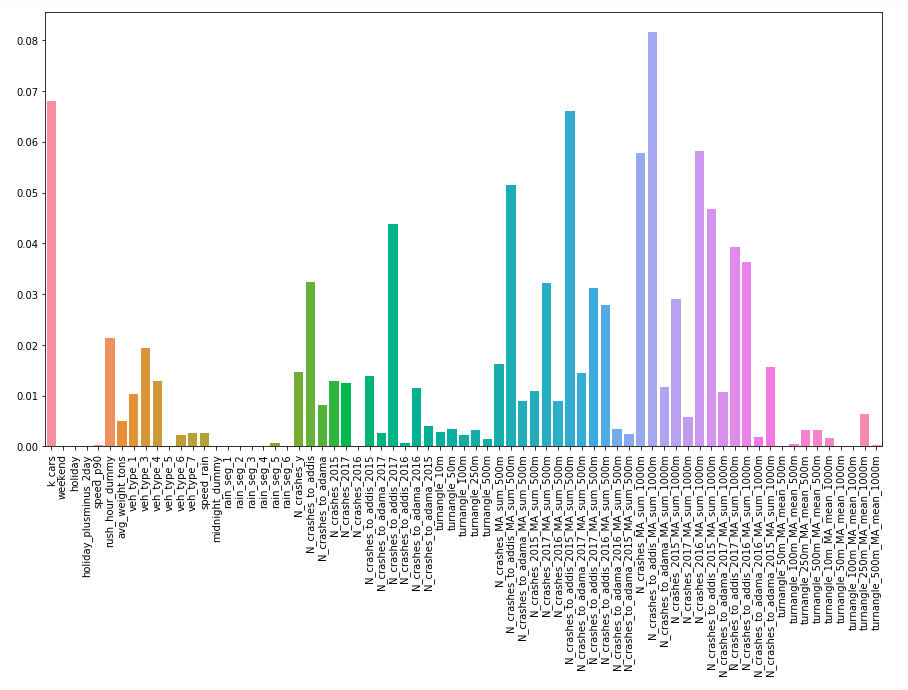

In [28]:
segment_time.accidents.sum()

670.0